In [135]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
os.getcwd()
os.chdir('/Users/margueritevergne/Downloads')

In [230]:
pope=pd.read_csv('./popes_25_December_2016.csv',encoding='latin1')
pope.head()
pope

,Common.name,Pontificate.Start,Pontificate.End,Year.Elected,Age.Election,Died.or.resigned.at.age,Age.Death,Years.as.Pope,Survival,Fel.Reg,Censored
0,Francis,from 13 March 2013,NaN,2013,76.29,NaN,80.1,3.79,3.79,1,1
1,Benedict XVI,from 19 April 2005,to 28 February 2013,2005,78.00,85.9,89.8,7.87,11.70,0,1
2,John Paul II,from 16 October 1978,to 2 April 2005,1978,58.00,84.0,84.0,26,26.00,0,0
3,John Paul I,from 26 August 1978,to 28 September 1978,1978,65.00,65.0,65.0,<1,0.09,0,0
4,Paul VI,from 21 June 1963,to 6 August 1978,1963,65.00,80.0,80.0,15,15.00,0,0
5,John XXIII,from 28 October 1958,to 3 June 1963,1958,76.00,81.0,81.0,4,5.00,0,0
6,Pius XII,from 2 March 1939,to 9 October 1958,1939,63.00,82.0,82.0,19,19.00,0,0
7,Pius XI,from 6 February 1922,to 10 February 1939,1922,64.00,81.0,81.0,17,17.00,0,0
8,Benedict XV,from 3 September 1914,to 22 January 1922,1914,59.00,67.0,67.0,7,8.00,0,0
9,Pius X,from 4 August 1903,to 20 August 1914,1903,68.00,79.0,79.0,11,11.00,0,0


In [231]:
#checking types
pope.dtypes

Common.name                 object
Pontificate.Start           object
Pontificate.End             object
Year.Elected                 int64
Age.Election               float64
Died.or.resigned.at.age    float64
Age.Death                  float64
Years.as.Pope               object
Survival                   float64
Fel.Reg                      int64
Censored                     int64
dtype: object

In [232]:
#checking the shape
pope.shape

(63, 11)

In [233]:
#Dropping the first row as this is the one we are trying to predict
pope.drop(0,inplace=True)

#checking null values
pope.isna().sum()

Common.name                0
Pontificate.Start          0
Pontificate.End            0
Year.Elected               0
Age.Election               0
Died.or.resigned.at.age    0
Age.Death                  0
Years.as.Pope              0
Survival                   0
Fel.Reg                    0
Censored                   0
dtype: int64

# Data Cleaning

In [234]:
#Cleaning Date format columns
pope['Pontificate.Start']=pope['Pontificate.Start'].str.replace("from ","")
pope['Pontificate.Start'] = pope['Pontificate.Start'].apply(lambda x: datetime.strptime(x, "%d %B %Y").date())

pope['Pontificate.End']=pope['Pontificate.End'].str.replace("to ","")
pope['Pontificate.End'] = pope['Pontificate.End'].apply(lambda x: datetime.strptime(x, "%d %B %Y").date())



In [235]:
#Changing format of Year Elected
pope['Year.Elected'].astype(int)
#Changing wrong value to numerical value
pope['Years.as.Pope']=pope['Years.as.Pope'].str.replace("<1","0.5")
#pope['Years.as.Pope'].apply(lambda x: float(x))
pope['Years.as.Pope'].astype(float)
pope.head()

,Common.name,Pontificate.Start,Pontificate.End,Year.Elected,Age.Election,Died.or.resigned.at.age,Age.Death,Years.as.Pope,Survival,Fel.Reg,Censored
1,Benedict XVI,2005-04-19,2013-02-28,2005,78.0,85.9,89.8,7.87,11.70,0,1
2,John Paul II,1978-10-16,2005-04-02,1978,58.0,84.0,84.0,26,26.00,0,0
3,John Paul I,1978-08-26,1978-09-28,1978,65.0,65.0,65.0,0.5,0.09,0,0
4,Paul VI,1963-06-21,1978-08-06,1963,65.0,80.0,80.0,15,15.00,0,0
5,John XXIII,1958-10-28,1963-06-03,1958,76.0,81.0,81.0,4,5.00,0,0


In [236]:
pope['Years.as.Pope']=pd.to_numeric(pope['Years.as.Pope'], downcast='float')

In [237]:
#Extracting the main name of each pope
pope['Major_name']=pope['Common.name'].str.extract(r'(.*\s)', expand=True)
pope.Major_name.value_counts()

Pius          11
Clement        8
Innocent       7
Gregory        5
Paul           5
Leo            4
Benedict       4
Alexander      3
Urban          2
Julius         2
John Paul      2
Sixtus         2
Adrian         1
Martin         1
John           1
Marcellus      1
Calixtus       1
Eugene         1
Nicholas       1
Name: Major_name, dtype: int64

In [238]:
# Creating bins for each century
Century_labels = ['15th Century', '16th Century', '17th Century', '18th Century', '19th Century','20th Century','21th Century']

In [239]:
#creating cut offs and adding the new Century column to our Dataframe
cutoffs = [1400,1500,1600,1700,1800,1900,2000,2100]
pope['Century'] = pd.cut(pope['Year.Elected'],cutoffs, labels=Century_labels)


In [240]:
#Creating a colum with century as integer
Century_number=[]
for i in pope.Century:
    if i=='21th Century':
        Century_number.append('21')
    if i=='20th Century':
        Century_number.append('20')
    if i=='19th Century':
        Century_number.append('19')
    if i=='18th Century':
        Century_number.append('18')
    if i=='17th Century':
        Century_number.append('17')
    if i=='16th Century':
        Century_number.append('16')
    if i=='15th Century':
        Century_number.append('15')
print(Century_number)

['21', '20', '20', '20', '20', '20', '20', '20', '20', '19', '19', '19', '19', '19', '18', '18', '18', '18', '18', '18', '18', '18', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15']


In [241]:
pope['Century_number']=Century_number
pope['Century_number']=pd.to_numeric(pope['Century_number'])


pope1=pd.get_dummies(pope, columns=['Century_number'], drop_first=True)


In [242]:
pope.drop(['Fel.Reg','Censored','Survival'],axis=1,inplace=True)
pope

,Common.name,Pontificate.Start,Pontificate.End,Year.Elected,Age.Election,Died.or.resigned.at.age,Age.Death,Years.as.Pope,Major_name,Century,Century_number
1,Benedict XVI,2005-04-19,2013-02-28,2005,78.0,85.9,89.8,7.87,Benedict,21th Century,21
2,John Paul II,1978-10-16,2005-04-02,1978,58.0,84.0,84.0,26.00,John Paul,20th Century,20
3,John Paul I,1978-08-26,1978-09-28,1978,65.0,65.0,65.0,0.50,John Paul,20th Century,20
4,Paul VI,1963-06-21,1978-08-06,1963,65.0,80.0,80.0,15.00,Paul,20th Century,20
5,John XXIII,1958-10-28,1963-06-03,1958,76.0,81.0,81.0,4.00,John,20th Century,20
6,Pius XII,1939-03-02,1958-10-09,1939,63.0,82.0,82.0,19.00,Pius,20th Century,20
7,Pius XI,1922-02-06,1939-02-10,1922,64.0,81.0,81.0,17.00,Pius,20th Century,20
8,Benedict XV,1914-09-03,1922-01-22,1914,59.0,67.0,67.0,7.00,Benedict,20th Century,20
9,Pius X,1903-08-04,1914-08-20,1903,68.0,79.0,79.0,11.00,Pius,20th Century,20
10,Leo XIII,1878-02-20,1903-07-20,1878,67.0,93.0,93.0,25.00,Leo,19th Century,19


# Linear Regression

In [148]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model

In [156]:
pope.corr()

,Year.Elected,Age.Election,Died.or.resigned.at.age,Age.Death,Years.as.Pope,Survival,Fel.Reg,Censored,Century_number
Year.Elected,1.000000,0.293168,0.498306,0.498703,0.322409,0.315873,NaN,0.263292,0.984507
Age.Election,0.293168,1.000000,0.718637,0.723787,-0.299784,-0.280876,NaN,0.205393,0.292123
Died.or.resigned.at.age,0.498306,0.718637,1.000000,0.998666,0.445951,0.463788,NaN,0.169745,0.481371
Age.Death,0.498703,0.723787,0.998666,1.000000,0.437391,0.458854,NaN,0.214636,0.484388
Years.as.Pope,0.322409,-0.299784,0.445951,0.437391,1.000000,0.994622,NaN,-0.027342,0.300163
Survival,0.315873,-0.280876,0.463788,0.458854,0.994622,1.000000,NaN,0.031920,0.297316
Fel.Reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Censored,0.263292,0.205393,0.169745,0.214636,-0.027342,0.031920,NaN,1.000000,0.295217
Century_number,0.984507,0.292123,0.481371,0.484388,0.300163,0.297316,NaN,0.295217,1.000000


In [170]:
pope1.columns

Index(['Common.name', 'Pontificate.Start', 'Pontificate.End', 'Year.Elected',
       'Age.Election', 'Died.or.resigned.at.age', 'Age.Death', 'Years.as.Pope',
       'Survival', 'Fel.Reg', 'Censored', 'Major_name', 'Century',
       'Century_number_16', 'Century_number_17', 'Century_number_18',
       'Century_number_19', 'Century_number_20', 'Century_number_21'],
      dtype='object')

In [171]:
#defining variables
X=pope1[['Age.Election','Century_number_16', 'Century_number_17', 'Century_number_18','Century_number_19', 'Century_number_20', 'Century_number_21']]
y=pope1[['Years.as.Pope']]

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [172]:
# Training model
pope_model = linear_model.LinearRegression()
pope_model.fit(X,y)

y_test_pred=pope_model.predict(X)
y_test_pred.shape

(62, 1)

In [173]:
#printing R2 score
from sklearn.metrics import r2_score
print('R2 for train set is',r2_score(y, y_test_pred))

R2 for train set is 0.31545944254916203


(1, 7)

In [186]:
X_Francis=[77,0,0,0,0,0,1]
pope_model.predict(pd.DataFrame(X_Francis).T)



array([[8.20082476]])

# Survival Analysis

In [33]:
import plotly.plotly as py
import cufflinks as cf

cf.go_offline()
from lifelines import KaplanMeierFitter
import re

In [43]:
# Creating the function that will define the compenents for survival analysis
def survival(data, group_field, time_field, event_field):
    model = KaplanMeierFitter()
    results = []
    
    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        model.fit(T, E, label=str(i))
        results.append(model.survival_function_)
    
    survival = pd.concat(results, axis=1)
    return survival

In [62]:
#Survival Curves for Names
rates = survival(pope, 'Major_name', 'Years.as.Pope', 'Age.Election')

rates.iplot(kind='line', xTitle='Years.as.Pope', yTitle='Age of Election',
            title='Age of Election by Years as a Pope, and Name')



In [59]:
# Survival Curves for Century
rates = survival(pope, 'Century', 'Years.as.Pope', 'Age.Election')

rates.iplot(kind='line', xTitle='Years.as.Pope', yTitle='Age of Election',
            title='Age of Election by Year as a Pope and Century of Election')



,Year.Elected,Age.Election,Died.or.resigned.at.age,Age.Death,Years.as.Pope,Survival,Fel.Reg,Censored
Year.Elected,1.000000,0.293168,0.498306,0.498703,0.322409,0.315873,NaN,0.263292
Age.Election,0.293168,1.000000,0.718637,0.723787,-0.299784,-0.280876,NaN,0.205393
Died.or.resigned.at.age,0.498306,0.718637,1.000000,0.998666,0.445951,0.463788,NaN,0.169745
Age.Death,0.498703,0.723787,0.998666,1.000000,0.437391,0.458854,NaN,0.214636
Years.as.Pope,0.322409,-0.299784,0.445951,0.437391,1.000000,0.994622,NaN,-0.027342
Survival,0.315873,-0.280876,0.463788,0.458854,0.994622,1.000000,NaN,0.031920
Fel.Reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Censored,0.263292,0.205393,0.169745,0.214636,-0.027342,0.031920,NaN,1.000000


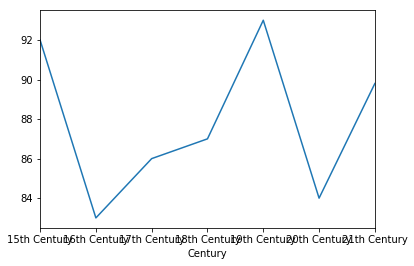

In [94]:
import matplotlib.pyplot as plt
pope.groupby(['Century'])['Age.Death'].max().plot()
pope.corr()